In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import OLSInfluence

# Load the dataset
df = pd.read_csv('/content/50_Startups.csv')

# Display the first few rows of the dataframe
print(df.head())


   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [38]:
df.shape


(50, 5)

In [39]:
# Summary statistics
print(df.describe())

           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [40]:
# Check for any missing values
print(df.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64


In [41]:
# Check the data types of each column
print(df.dtypes)

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object


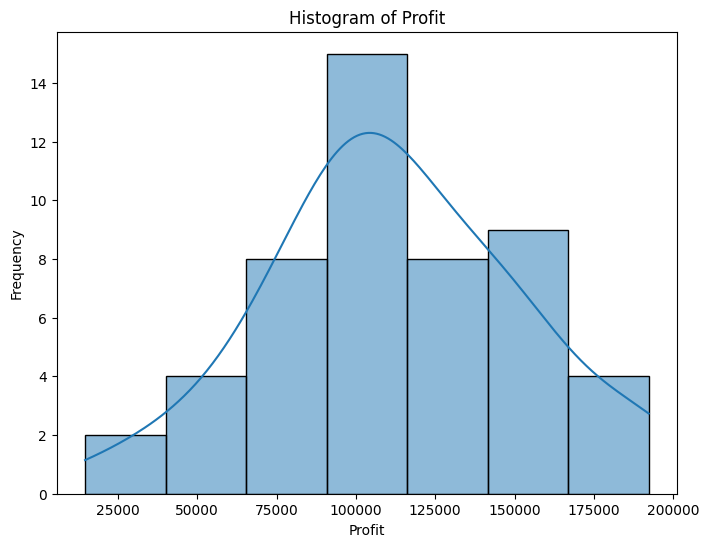

In [42]:
# Univariate Analysis

# Histogram for dependent variable
plt.figure(figsize=(8, 6))
sns.histplot(df['Profit'], kde=True)
plt.title('Histogram of Profit')
plt.xlabel('Profit')
plt.ylabel('Frequency')
plt.show()

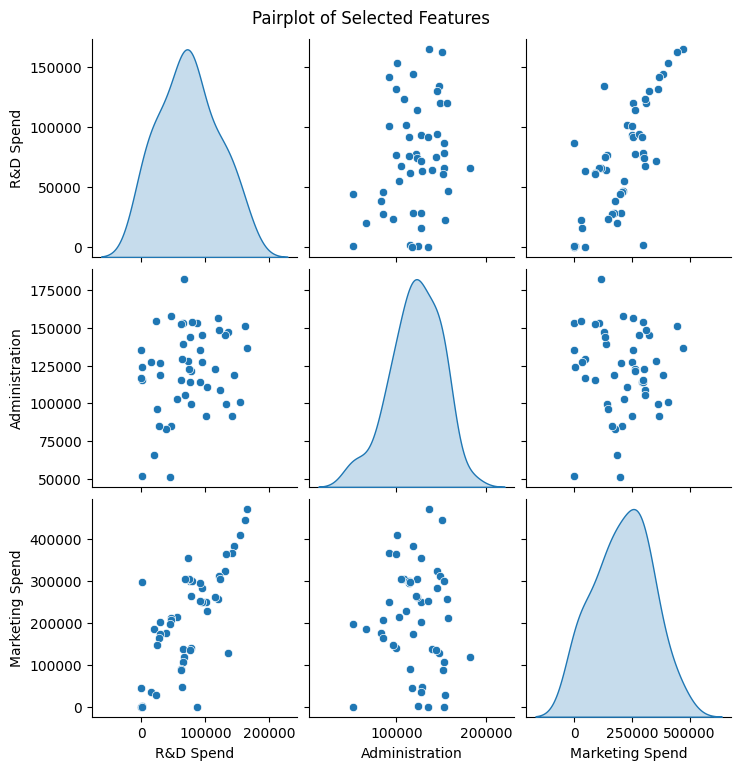

In [43]:
# Bivariate Analysis

# Pairplot for selected features
selected_features = ['R&D Spend', 'Administration', 'Marketing Spend']
sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

<ipython-input-44-3a931ab7bdb2>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


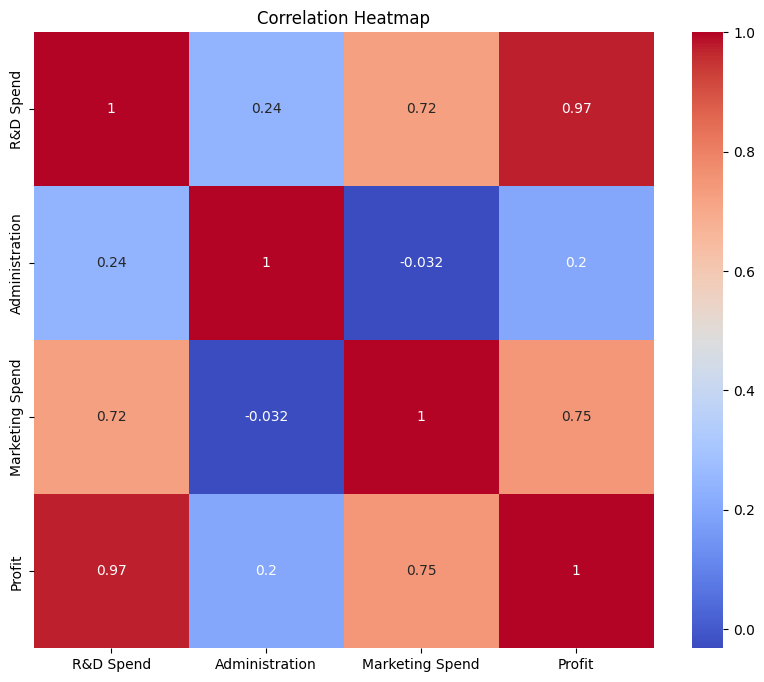

In [44]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [45]:
# Handling categorical variable 'State' using one-hot encoding
df = pd.get_dummies(df, columns=['State'], drop_first=True)

# Check the updated dataframe
print(df.head())


   R&D Spend  Administration  Marketing Spend     Profit  State_Florida  \
0  165349.20       136897.80        471784.10  192261.83              0   
1  162597.70       151377.59        443898.53  191792.06              0   
2  153441.51       101145.55        407934.54  191050.39              1   
3  144372.41       118671.85        383199.62  182901.99              0   
4  142107.34        91391.77        366168.42  166187.94              1   

   State_New York  
0               1  
1               0  
2               0  
3               1  
4               0  


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Define features and target variable
X = df.drop(columns=['Profit'])
y = df['Profit']


In [47]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
# Train the Multiple Linear Regression model
model = sm.OLS(y_train, X_train).fit()

In [53]:
# Predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

In [54]:
# Calculate R^2 value for train and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print('R^2 value for train set:', r2_train)
print('R^2 value for test set:', r2_test)

R^2 value for train set: 0.8981296245715363
R^2 value for test set: 0.7457227743353299


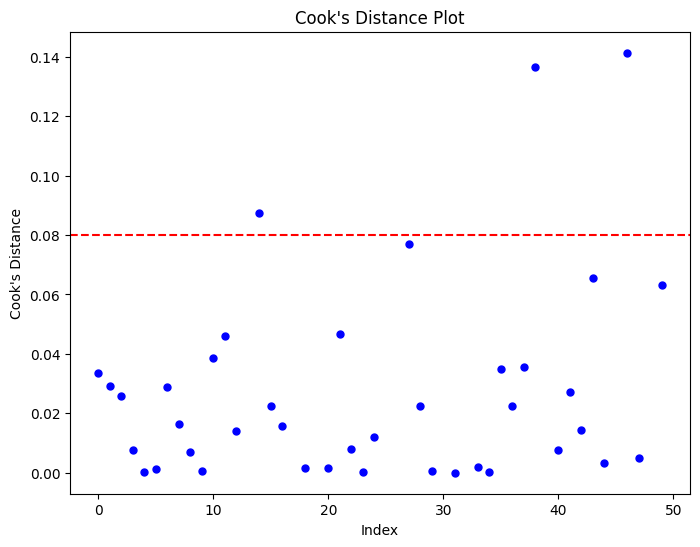

In [56]:
# Cook's distance plot
influence = OLSInfluence(model)
cook_distance = influence.cooks_distance
plt.figure(figsize=(8, 6))
plt.plot(cook_distance[0], 'bo', markersize=5)
plt.title("Cook's Distance Plot")
plt.xlabel('Index')
plt.ylabel("Cook's Distance")
plt.axhline(y=4/len(data), color='r', linestyle='--')
plt.show()

<Figure size 1200x800 with 0 Axes>

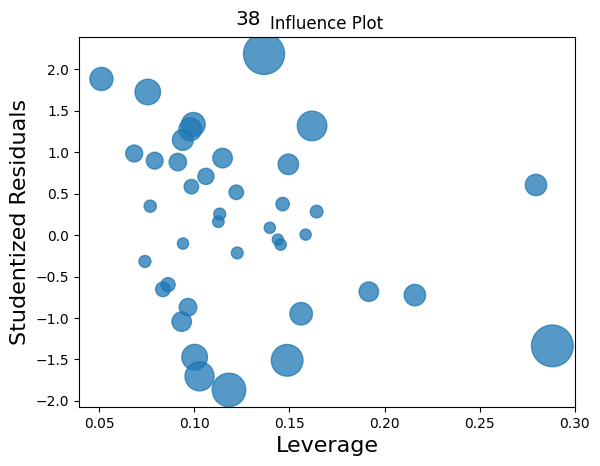

In [55]:
# Influence plot
plt.figure(figsize=(12, 8))
sm.graphics.influence_plot(model, criterion="cooks", size=30)
plt.title('Influence Plot')
plt.show()